### Segmentación
A partir de la imagen de bloques encontrar, mediante alguno de los métodos mencionados o combinación de ellos (inclusive pueden utilizar operaciones morfológicas como las vistas anteriormente) la mejor segmentación de los bloques respecto del resto de las piezas. 

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

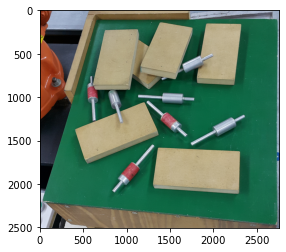

In [2]:
img = cv.imread('piezas.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

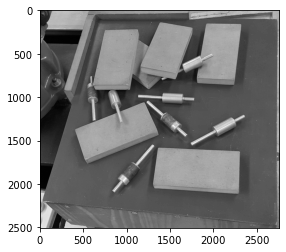

In [3]:
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap='gray')
plt.show()

####  Recortamos la imágen para obtener solo los bloques y no todo el fondo innecesario

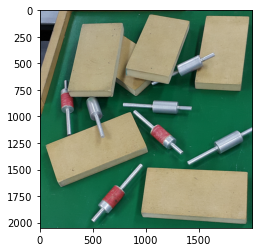

In [4]:
cutoutImg = img[100:2150, 350:2350]
plt.imshow(cutoutImg)
plt.show()

### Watershed

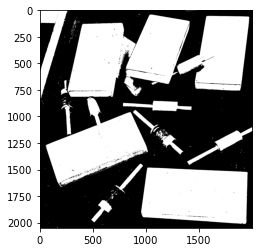

In [5]:
gray = cv.cvtColor(cutoutImg,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.figure()
plt.imshow(thresh,cmap='gray')

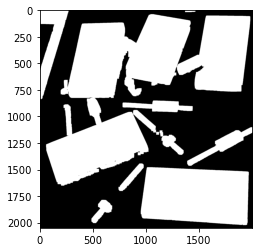

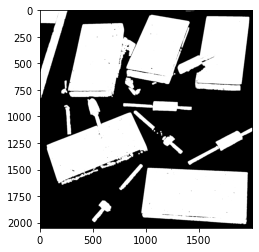

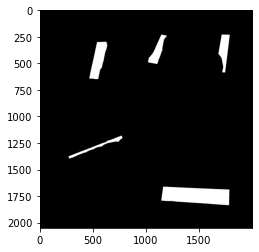

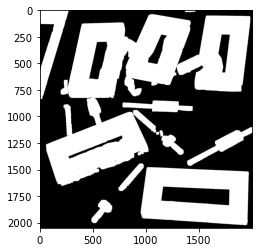

In [6]:
kernel = np.ones((6,6),np.uint8)

opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv.dilate(opening,kernel,iterations=3)

closing = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 2)

dist_transform = cv.distanceTransform(closing,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


fig=plt.figure('Sure BG')
plt.imshow(sure_bg,cmap='gray')

fig=plt.figure('Opening')
plt.imshow(opening,cmap='gray')

fig=plt.figure('Sure FG')
plt.imshow(sure_fg,cmap='gray')

fig=plt.figure('Fondo seguro')
plt.imshow(unknown,cmap='gray')

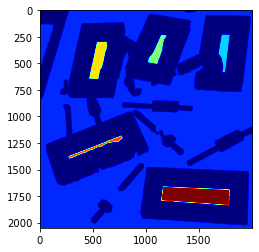

In [7]:
ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

plt.figure()
plt.imshow(markers,cmap='jet')

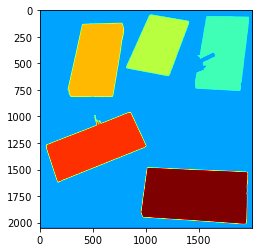

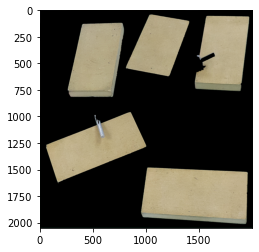

In [8]:
watershed = cutoutImg.copy()
markers = cv.watershed(watershed,markers)
watershed[markers == 1] = [0,0,0]

plt.figure()
plt.imshow(markers,cmap='jet')

plt.figure()
plt.imshow(watershed,cmap='jet')

### K Means

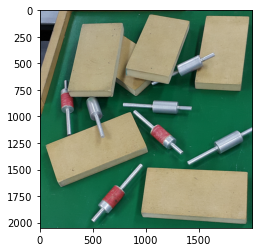

In [9]:
plt.imshow(cutoutImg)
plt.show()


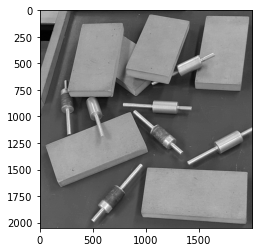

In [10]:
grayImg = cv.cvtColor(cutoutImg, cv.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap='gray')
plt.show()

In [11]:
Z = cutoutImg.reshape((-1,3))
Z = np.float32(Z)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 50, 0.5)
K = 10

ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

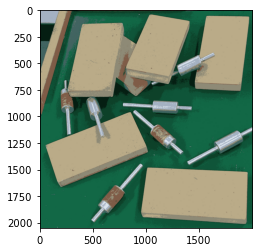

In [12]:
center = np.uint8(center)
label = label.flatten()
compact = np.uint8(ret)

img_out = center[label]  
img_out = img_out.reshape((cutoutImg.shape))
plt.imshow(img_out)
plt.show()

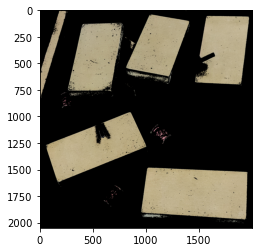

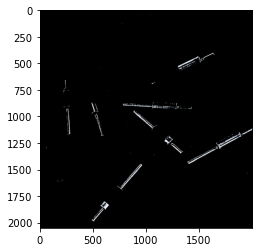

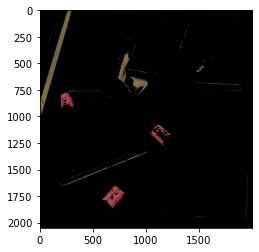

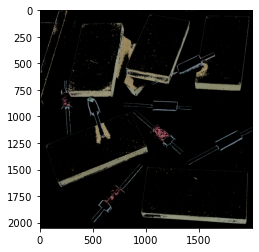

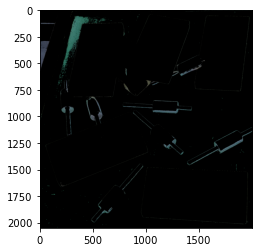

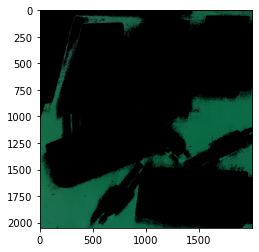

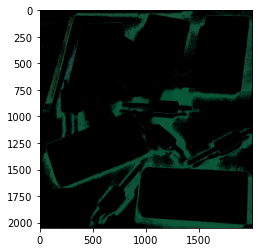

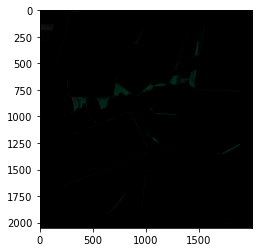

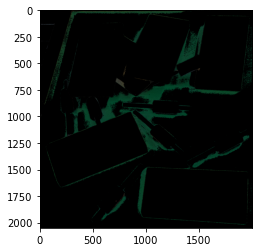

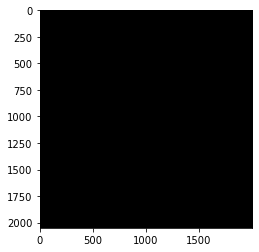

In [13]:
copy = cutoutImg.copy()
copy = copy.reshape((-1, 3))
for cluster in range(1,11):
    clusterCopy = copy.copy()
    clusterCopy[label != cluster] = [0, 0, 0]
    clusterCopy = clusterCopy.reshape(cutoutImg.shape)
    plt.imshow(clusterCopy)
    plt.show()

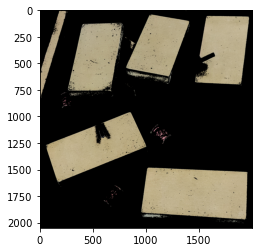

In [17]:
cluster = 1
kmeans = cutoutImg.copy()
kmeans = kmeans.reshape((-1, 3))
kmeans[label != cluster] = [0, 0, 0]
kmeans = kmeans.reshape(cutoutImg.shape)
plt.imshow(kmeans)
plt.show()

### Conclusiones

Comparamos ambos resultados:

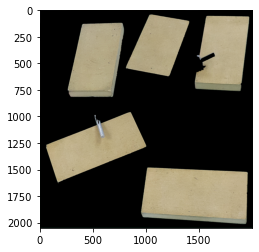

In [18]:
## Watershed
plt.figure()
plt.imshow(watershed,cmap='jet')

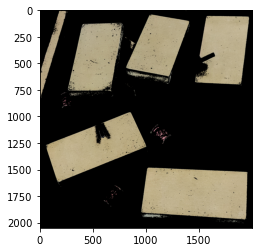

In [19]:
##Kmeans
plt.figure()
plt.imshow(kmeans)

Se puede ver como el resultado obtenido por watershed es mejor, y más performante además para este tipo de imágen. 